In [20]:
import pandas as pd
import numpy as np

In [21]:
path1 = '/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/HFI_South Africa_Latest.xlsx'
path2 = '/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Historical_Data_28th Sept 2021.xlsx'
path3 = '/home/vaibhavsharma/Desktop/DS23/hv/Datasets/indicator_list_SA.csv'

data1 = pd.read_excel(path1, engine= 'openpyxl')
data2 = pd.read_excel(path2, engine= 'openpyxl')
# df_ind_list = pd.read_csv(path3)

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df_ind_list = pd.read_csv(path3)
df1.head(3)

,period,indicator_code,indicator_name,actual_value
0,2021-08-31,SAFZAXX02Ma015,PMI Manufacturing,57.9
1,2021-07-31,SAFZAXX14Ma004,Net Foreign Assets,5015.0
2,2021-07-31,SAFZAXX04Ma005,M1 Money Supply,2212022.0


In [22]:
df1.shape

(6330, 4)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   period          6330 non-null   datetime64[ns]
 1   indicator_code  6330 non-null   object        
 2   indicator_name  6330 non-null   object        
 3   actual_value    6330 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 197.9+ KB


In [24]:
df1['period'].sort_values(ascending= False)

0      2021-08-31
6      2021-07-31
1      2021-07-31
8      2021-07-31
7      2021-07-31
          ...    
6325   1961-05-31
6326   1961-04-30
6327   1961-03-31
6328   1961-02-28
6329   1961-01-31
Name: period, Length: 6330, dtype: datetime64[ns]

In [25]:
df1['indicator_name'].value_counts(ascending= False)

indicator_name
Net Foreign Assets                          727
M1 Money Supply                             677
M3 Money Supply                             677
Claims on the Private Sector                677
Total Power Generation                      439
Consumer Price Index                        390
Retail Sales - Total                        366
Net Gold & Forex Reserve                    343
Motor Trade Sales at Current Prices s.a.    282
PMI Manufacturing                           264
Electricity Consumption (YoY)               235
Sales of Accessories - Income               190
Convenient Store Sales - Income             190
Fuel Sales - Income                         190
New Vehicle Sales                           190
Used Vehicle Sales                          190
Workshop Income                             190
Real GDP at Market Prices                   113
Name: count, dtype: int64

In [26]:
len(df1['indicator_name'].unique())

18

In [27]:
df1[df1['indicator_name'] == 'Net Foreign Assets'].head()

,period,indicator_code,indicator_name,actual_value
1,2021-07-31,SAFZAXX14Ma004,Net Foreign Assets,5015.0
10,2021-06-30,SAFZAXX14Ma004,Net Foreign Assets,58399.0
27,2021-05-31,SAFZAXX14Ma004,Net Foreign Assets,-956.0
44,2021-04-30,SAFZAXX14Ma004,Net Foreign Assets,-28805.0
61,2021-03-31,SAFZAXX14Ma004,Net Foreign Assets,-20690.0


In [28]:
def check_freq(df, indicator_name):
    return df[df['indicator_name'] == indicator_name].head()

In [29]:
check_freq(df1, 'Real GDP at Market Prices')

,period,indicator_code,indicator_name,actual_value
69,2021-03-31,SAFZAXX08Qa001,Real GDP at Market Prices,740624.0
121,2020-12-31,SAFZAXX08Qa001,Real GDP at Market Prices,771924.9
173,2020-09-30,SAFZAXX08Qa001,Real GDP at Market Prices,744589.9
225,2020-06-30,SAFZAXX08Qa001,Real GDP at Market Prices,648135.2
277,2020-03-31,SAFZAXX08Qa001,Real GDP at Market Prices,764788.0


In [30]:
df1.head(10)

,period,indicator_code,indicator_name,actual_value
0,2021-08-31,SAFZAXX02Ma015,PMI Manufacturing,57.90
1,2021-07-31,SAFZAXX14Ma004,Net Foreign Assets,5015.00
2,2021-07-31,SAFZAXX04Ma005,M1 Money Supply,2212022.00
3,2021-07-31,SAFZAXX04Ma006,M3 Money Supply,4221929.00
4,2021-07-31,SAFZAXX04Ma008,Claims on the Private Sector,33200.00
5,2021-07-31,SAFZAXX02Ma072,Total Power Generation,22285.00
6,2021-07-31,SAFZAXX05Ma005,Consumer Price Index,121.80
7,2021-07-31,SAFZAXX06Ma001,Net Gold & Forex Reserve,51.65
8,2021-07-31,SAFZAXX02Ma015,PMI Manufacturing,43.50
9,2021-07-31,SAFZAXX02Ma007,Electricity Consumption (YoY),2.90


In [31]:
df1[df1['indicator_name'] == 'PMI Manufacturing'].head()

,period,indicator_code,indicator_name,actual_value
0,2021-08-31,SAFZAXX02Ma015,PMI Manufacturing,57.9
8,2021-07-31,SAFZAXX02Ma015,PMI Manufacturing,43.5
19,2021-06-30,SAFZAXX02Ma015,PMI Manufacturing,57.4
36,2021-05-31,SAFZAXX02Ma015,PMI Manufacturing,57.8
53,2021-04-30,SAFZAXX02Ma015,PMI Manufacturing,56.2


### Transformation

In [32]:
def transform_df(df, indicator):
    df = df[df['indicator_name'] == indicator].sort_values(ascending= False, by= 'period')
    df.rename(columns = {'actual_value': indicator}, inplace = True)
    df.drop(columns= ['indicator_code', 'indicator_name'], inplace= True, axis= 1)
    return df

In [33]:
df1_1 = transform_df(df1, 'Net Foreign Assets')
df1_2 = transform_df(df1, 'M1 Money Supply')
df1_3 = transform_df(df1, 'M3 Money Supply')
df1_4 = transform_df(df1, 'Claims on the Private Sector')
df1_5 = transform_df(df1, 'Consumer Price Index')
df1_6 = transform_df(df1, 'Retail Sales - Total')
df1_7 = transform_df(df1, 'Net Gold & Forex Reserve')
df1_8 = transform_df(df1, 'Motor Trade Sales at Current Prices s.a.')
df1_9 = transform_df(df1, 'PMI Manufacturing')
df1_10 = transform_df(df1, 'Electricity Consumption (YoY)')
df1_11 = transform_df(df1, 'Sales of Accessories - Income')
df1_12 = transform_df(df1, 'Convenient Store Sales - Income')
df1_13 = transform_df(df1, 'Fuel Sales - Income')
df1_14 = transform_df(df1, 'Sales of Accessories - Income')
df1_15 = transform_df(df1, 'New Vehicle Sales')
df1_16 = transform_df(df1, 'Used Vehicle Sales')
df1_17 = transform_df(df1, 'Workshop Income')
df1_18 = transform_df(df1, 'Real GDP at Market Prices')

df1_list = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6, df1_7, df1_8, df1_9, df1_10, df1_11, df1_12, df1_13, df1_14, df1_15, df1_16, df1_17]

In [34]:
df1_1.head()

,period,Net Foreign Assets
1,2021-07-31,5015.0
10,2021-06-30,58399.0
27,2021-05-31,-956.0
44,2021-04-30,-28805.0
61,2021-03-31,-20690.0


In [35]:
df1_2.head()

,period,M1 Money Supply
2,2021-07-31,2212022.0
11,2021-06-30,2185382.0
28,2021-05-31,2231698.0
45,2021-04-30,2196437.0
62,2021-03-31,2249135.0


In [36]:
## Creating a new column depicting month and year and combing the indicators based on that month/year combination

# df1['month'] = df1['period'].dt.month
# df1['year'] = df1['period'].dt.year

In [37]:
pd.merge(df1_1,df1_2, on='period')

,period,Net Foreign Assets,M1 Money Supply
0,2021-07-31,5015.0,2212022.0
1,2021-06-30,58399.0,2185382.0
2,2021-05-31,-956.0,2231698.0
3,2021-04-30,-28805.0,2196437.0
4,2021-03-31,-20690.0,2249135.0
...,...,...,...
672,1965-07-31,10.0,1506.0
673,1965-06-30,-26.0,1512.0
674,1965-05-31,-38.0,1511.0
675,1965-04-30,-32.0,1533.0


In [38]:
def merge_dataframes(dataframes, merge_column):
    
    if len(dataframes) < 2:
        raise ValueError("At least two DataFrames are required for merging.")

    merged_df = dataframes[0]  

    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=merge_column, how='inner')

    return merged_df

In [39]:
merged_df = merge_dataframes(df1_list, 'period')
merged_df.tail()

,period,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,Sales of Accessories - Income_y,New Vehicle Sales,Used Vehicle Sales,Workshop Income
185,2006-01-31,2077.0,507636.0,1105100.0,18118.0,186.46,29962.0,18.70,28403.0,48.7,2.5,3059.0,1195.0,6510.0,3059.0,9483.0,4521.0,1959.0
186,2005-12-31,-3160.0,503053.0,1101130.0,25071.0,191.39,45006.0,17.19,28009.0,53.6,2.7,3127.0,1365.0,7288.0,3127.0,8928.0,4716.0,1910.0
187,2005-11-30,-18933.0,497319.0,1068703.0,27118.0,190.39,33989.0,16.49,27646.0,51.8,1.1,3576.0,1288.0,7040.0,3576.0,9941.0,5344.0,2137.0
188,2005-10-31,10702.0,491884.0,1059509.0,992.0,190.88,32228.0,16.22,27900.0,51.5,2.2,3419.0,1062.0,7174.0,3419.0,8907.0,5079.0,2118.0
189,2005-09-30,-5501.0,500038.0,1052858.0,27916.0,190.42,30406.0,16.06,27285.0,55.6,0.1,3148.0,1177.0,6856.0,3148.0,9573.0,5140.0,2132.0


In [40]:
# Merging the dfs and then finding the length of records, EXCLUDING 'Real GDP'

len(merged_df.columns), len(merged_df)

(18, 190)

In [41]:
# Resampling the monthly frequency data to 'quarterly' 

merged_df.set_index(['period'], inplace= True)

merged_df = merged_df.resample('Q').median()
merged_df.tail()

,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,Sales of Accessories - Income_y,New Vehicle Sales,Used Vehicle Sales,Workshop Income
period,,,,,,,,,,,,,,,,,
2020-06-30,31414.0,2060948.0,4098485.0,-13425.0,114.9,80813.0,45.530,29820.0,50.2,-13.6,6790.0,1311.0,8350.0,6790.0,5635.0,4415.0,1850.0
2020-09-30,-4299.0,2120408.0,4142152.0,-12771.0,116.6,88078.0,50.520,52276.0,57.3,-2.1,9679.0,1679.0,13691.0,9679.0,12981.0,11081.0,3601.0
2020-12-31,-27048.0,2189376.0,4118602.0,16090.0,117.1,103799.0,51.364,53292.0,52.6,-2.1,9996.0,1926.0,14522.0,9996.0,13442.0,11553.0,3580.0
2021-03-31,-3967.0,2196472.0,4119910.0,-10121.0,118.5,92091.0,51.577,54580.0,53.0,-2.4,9370.0,1833.0,13590.0,9370.0,13372.0,10843.0,3453.0
2021-06-30,-956.0,2196437.0,4148071.0,-854.0,120.2,95144.0,51.504,57150.0,57.4,12.3,9851.0,1924.0,15533.0,9851.0,14482.0,10765.0,3663.0


In [42]:
# After resampling monthly indicators to quarterly

len(merged_df)

64

In [43]:
# Merging the last 'Real GDP' column with rest of the data

merged_df = pd.merge(merged_df, df1_18, on= 'period', how= 'outer')
merged_df.head()

,period,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,Sales of Accessories - Income_y,New Vehicle Sales,Used Vehicle Sales,Workshop Income,Real GDP at Market Prices
0,2005-09-30,-5501.0,500038.0,1052858.0,27916.0,190.42,30406.0,16.06,27285.0,55.6,0.1,3148.0,1177.0,6856.0,3148.0,9573.0,5140.0,2132.0,600212.1
1,2005-12-31,-3160.0,497319.0,1068703.0,25071.0,190.88,33989.0,16.49,27900.0,51.8,2.2,3419.0,1288.0,7174.0,3419.0,8928.0,5079.0,2118.0,606683.8
2,2006-03-31,11707.0,523525.0,1152856.0,24593.0,186.53,30688.0,18.98,28403.0,48.7,2.5,3264.0,1195.0,6510.0,3264.0,10110.0,4840.0,2144.0,593898.6
3,2006-06-30,24554.0,544464.0,1224090.0,17189.0,187.28,33304.0,20.18,29378.0,56.3,5.7,3315.0,1304.0,6973.0,3315.0,9630.0,5290.0,2279.0,615465.0
4,2006-09-30,1534.0,578691.0,1265811.0,37691.0,189.07,34492.0,20.95,31855.0,61.3,5.0,3411.0,1459.0,7593.0,3411.0,11455.0,5777.0,2546.0,632122.7


In [44]:
# Length of records (after resampling the monthly indicators to quarterly and including the Market GDP)

len(merged_df)

114

In [45]:
# Resampling the monthly frequency data to 'quarterly' 

# merged_df.set_index(['period'], inplace= True)

# merged_df = merged_df.resample('Q').mean()
# merged_df.tail()

In [46]:
# len(merged_df)

In [47]:
merged_df.sort_index(ascending= False)

,period,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,Sales of Accessories - Income_y,New Vehicle Sales,Used Vehicle Sales,Workshop Income,Real GDP at Market Prices
113,1993-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387582.2
112,1993-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397039.7
111,1993-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406123.9
110,1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410256.8
109,1994-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,395010.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2006-09-30,1534.0,578691.0,1265811.0,37691.0,189.07,34492.0,20.95,31855.0,61.3,5.0,3411.0,1459.0,7593.0,3411.0,11455.0,5777.0,2546.0,632122.7
3,2006-06-30,24554.0,544464.0,1224090.0,17189.0,187.28,33304.0,20.18,29378.0,56.3,5.7,3315.0,1304.0,6973.0,3315.0,9630.0,5290.0,2279.0,615465.0
2,2006-03-31,11707.0,523525.0,1152856.0,24593.0,186.53,30688.0,18.98,28403.0,48.7,2.5,3264.0,1195.0,6510.0,3264.0,10110.0,4840.0,2144.0,593898.6
1,2005-12-31,-3160.0,497319.0,1068703.0,25071.0,190.88,33989.0,16.49,27900.0,51.8,2.2,3419.0,1288.0,7174.0,3419.0,8928.0,5079.0,2118.0,606683.8


In [48]:
# Drop the records where the values are 'NaN'

merged_df.dropna(inplace= True)
merged_df

,period,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,Sales of Accessories - Income_y,New Vehicle Sales,Used Vehicle Sales,Workshop Income,Real GDP at Market Prices
0,2005-09-30,-5501.0,500038.0,1052858.0,27916.0,190.42,30406.0,16.060,27285.0,55.6,0.1,3148.0,1177.0,6856.0,3148.0,9573.0,5140.0,2132.0,600212.1
1,2005-12-31,-3160.0,497319.0,1068703.0,25071.0,190.88,33989.0,16.490,27900.0,51.8,2.2,3419.0,1288.0,7174.0,3419.0,8928.0,5079.0,2118.0,606683.8
2,2006-03-31,11707.0,523525.0,1152856.0,24593.0,186.53,30688.0,18.980,28403.0,48.7,2.5,3264.0,1195.0,6510.0,3264.0,10110.0,4840.0,2144.0,593898.6
3,2006-06-30,24554.0,544464.0,1224090.0,17189.0,187.28,33304.0,20.180,29378.0,56.3,5.7,3315.0,1304.0,6973.0,3315.0,9630.0,5290.0,2279.0,615465.0
4,2006-09-30,1534.0,578691.0,1265811.0,37691.0,189.07,34492.0,20.950,31855.0,61.3,5.0,3411.0,1459.0,7593.0,3411.0,11455.0,5777.0,2546.0,632122.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-03-31,98864.0,1836686.0,3807001.0,36364.0,115.20,87773.0,45.360,55771.0,45.2,-3.6,9081.0,2002.0,16292.0,9081.0,13275.0,10196.0,3576.0,764788.0
59,2020-06-30,31414.0,2060948.0,4098485.0,-13425.0,114.90,80813.0,45.530,29820.0,50.2,-13.6,6790.0,1311.0,8350.0,6790.0,5635.0,4415.0,1850.0,648135.2
60,2020-09-30,-4299.0,2120408.0,4142152.0,-12771.0,116.60,88078.0,50.520,52276.0,57.3,-2.1,9679.0,1679.0,13691.0,9679.0,12981.0,11081.0,3601.0,744589.9
61,2020-12-31,-27048.0,2189376.0,4118602.0,16090.0,117.10,103799.0,51.364,53292.0,52.6,-2.1,9996.0,1926.0,14522.0,9996.0,13442.0,11553.0,3580.0,771924.9


In [49]:
len(merged_df)

63

### SAving the file (zipped data sent by Ecopulse)

In [50]:
# merged_df.to_csv('merged_df-hv-nan-dropped.csv')

In [51]:
merged_df.drop(columns= ['Sales of Accessories - Income_y'], inplace= True)
merged_df.set_index(['period'], inplace= True)
merged_df

,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,New Vehicle Sales,Used Vehicle Sales,Workshop Income,Real GDP at Market Prices
period,,,,,,,,,,,,,,,,,
2005-09-30,-5501.0,500038.0,1052858.0,27916.0,190.42,30406.0,16.060,27285.0,55.6,0.1,3148.0,1177.0,6856.0,9573.0,5140.0,2132.0,600212.1
2005-12-31,-3160.0,497319.0,1068703.0,25071.0,190.88,33989.0,16.490,27900.0,51.8,2.2,3419.0,1288.0,7174.0,8928.0,5079.0,2118.0,606683.8
2006-03-31,11707.0,523525.0,1152856.0,24593.0,186.53,30688.0,18.980,28403.0,48.7,2.5,3264.0,1195.0,6510.0,10110.0,4840.0,2144.0,593898.6
2006-06-30,24554.0,544464.0,1224090.0,17189.0,187.28,33304.0,20.180,29378.0,56.3,5.7,3315.0,1304.0,6973.0,9630.0,5290.0,2279.0,615465.0
2006-09-30,1534.0,578691.0,1265811.0,37691.0,189.07,34492.0,20.950,31855.0,61.3,5.0,3411.0,1459.0,7593.0,11455.0,5777.0,2546.0,632122.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,98864.0,1836686.0,3807001.0,36364.0,115.20,87773.0,45.360,55771.0,45.2,-3.6,9081.0,2002.0,16292.0,13275.0,10196.0,3576.0,764788.0
2020-06-30,31414.0,2060948.0,4098485.0,-13425.0,114.90,80813.0,45.530,29820.0,50.2,-13.6,6790.0,1311.0,8350.0,5635.0,4415.0,1850.0,648135.2
2020-09-30,-4299.0,2120408.0,4142152.0,-12771.0,116.60,88078.0,50.520,52276.0,57.3,-2.1,9679.0,1679.0,13691.0,12981.0,11081.0,3601.0,744589.9


### Using Techniques for feature selection / importance

### 1. RFE (using random forest)

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_scaled = sc.fit_transform(merged_df)
df_scaled = pd.DataFrame(df_scaled, columns= merged_df.columns)

X = df_scaled.drop(columns= ['Real GDP at Market Prices'])
y = df_scaled['Real GDP at Market Prices']

In [53]:
# Final df value

len(X)

63

In [54]:
# Using n_estimators = 100

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state= 1)
rf.fit(X,y)


from sklearn.metrics import accuracy_score



In [55]:
importances = rf.feature_importances_
importances, len(importances)

(array([0.00147   , 0.01885147, 0.0388775 , 0.00249534, 0.00311484,
        0.07978956, 0.00995946, 0.18909629, 0.00189313, 0.00078244,
        0.01708515, 0.03099274, 0.23595404, 0.05483241, 0.14606273,
        0.16874291]),
 16)

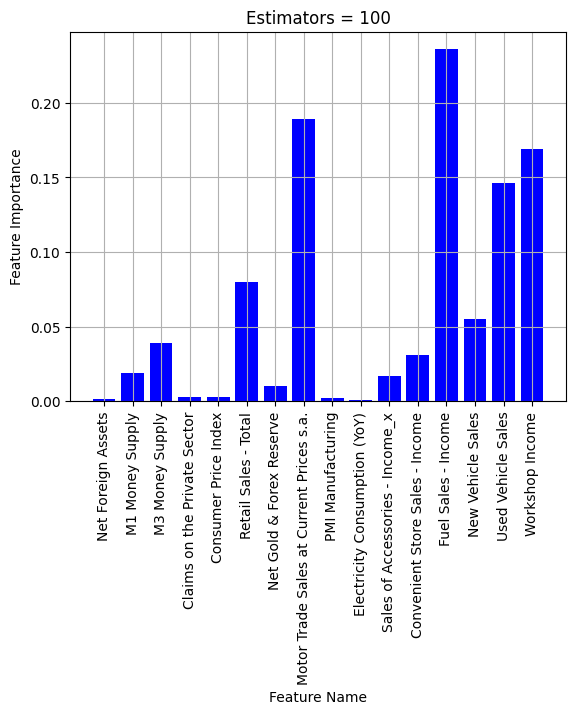

In [56]:
# Plotting the importances

import matplotlib.pyplot as plt

plt.xticks(rotation='vertical')
plt.bar(X.columns, importances, color = 'b')
plt.title('Estimators = 100')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.grid()
plt.show()

In [57]:
# # Using n_estimators = 50

rf_50 = RandomForestRegressor(n_estimators= 50, random_state= 1)
rf_50.fit(X,y)

importances_50 = rf_50.feature_importances_

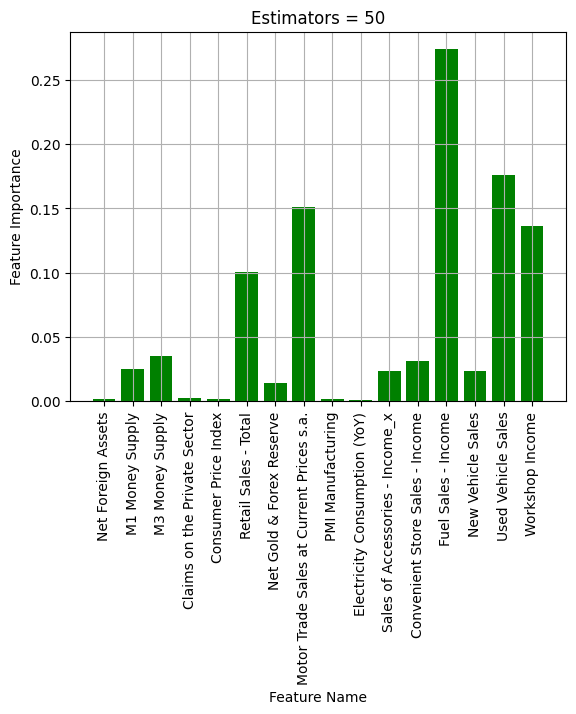

In [58]:
plt.xticks(rotation='vertical')
plt.bar(X.columns, importances_50, color = 'g')
plt.title('Estimators = 50')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.grid()
plt.show()

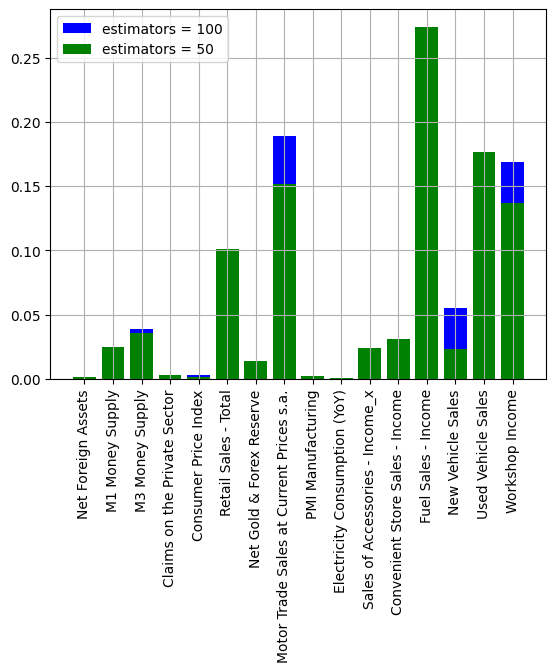

In [59]:
plt.bar(X.columns, importances, color = 'b', label= 'estimators = 100')
plt.bar(X.columns, importances_50, color = 'g', label= 'estimators = 50')
plt.xticks(rotation= 'vertical')
plt.legend()
plt.grid()
plt.show()

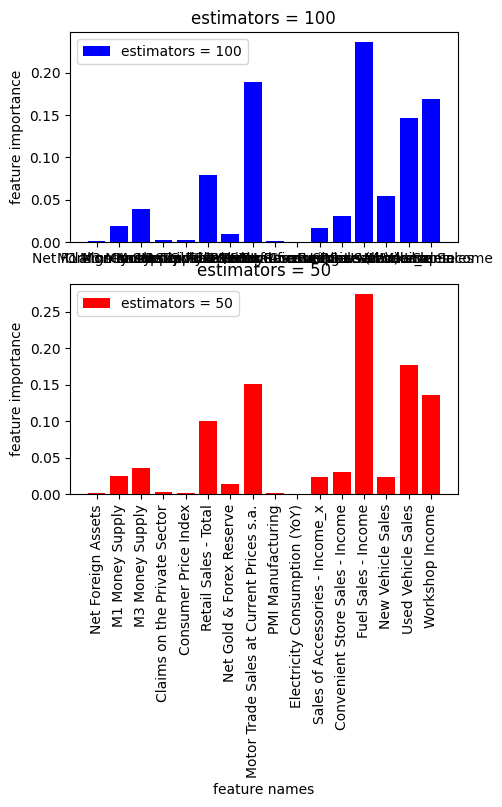

In [60]:
import numpy as np

x = X.columns
y1 = importances
y2 = importances_50

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))
plt.xticks(rotation= 'vertical')

# Plot data on the first subplot (ax1)
ax1.bar(x, y1, label='estimators = 100', color='blue')
ax1.set_title('estimators = 100')
ax1.set_xlabel(' ')
ax1.set_ylabel('feature importance')
ax1.legend()

# Plot data on the second subplot (ax2)
plt.xticks(rotation= 'vertical')
ax2.bar(x, y2, label='estimators = 50', color='red')
ax2.set_title('estimators = 50')
ax2.set_xlabel('feature names')
ax2.set_ylabel('feature importance')
ax2.legend()

plt.show()


In [61]:
df_scaled.corr()

,Net Foreign Assets,M1 Money Supply,M3 Money Supply,Claims on the Private Sector,Consumer Price Index,Retail Sales - Total,Net Gold & Forex Reserve,Motor Trade Sales at Current Prices s.a.,PMI Manufacturing,Electricity Consumption (YoY),Sales of Accessories - Income_x,Convenient Store Sales - Income,Fuel Sales - Income,New Vehicle Sales,Used Vehicle Sales,Workshop Income,Real GDP at Market Prices
Net Foreign Assets,1.000000,-0.015676,0.020340,0.142291,0.007370,-0.061883,0.022622,-0.042513,-0.144617,-0.118237,-0.078124,-0.014878,0.003218,-0.081729,-0.101454,-0.152425,-0.076788
M1 Money Supply,-0.015676,1.000000,0.990251,-0.258659,-0.157127,0.964476,0.660684,0.829770,-0.185499,-0.439791,0.931158,0.700969,0.688460,0.634935,0.878759,0.733470,0.782715
M3 Money Supply,0.020340,0.990251,1.000000,-0.287183,-0.266319,0.967298,0.732746,0.844691,-0.248307,-0.480104,0.946363,0.721491,0.736538,0.616282,0.866090,0.754764,0.818597
Claims on the Private Sector,0.142291,-0.258659,-0.287183,1.000000,0.264816,-0.189074,-0.310001,-0.006530,0.066281,0.217436,-0.177184,0.157877,-0.008826,0.232338,-0.043545,0.013581,-0.075822
Consumer Price Index,0.007370,-0.157127,-0.266319,0.264816,1.000000,-0.224152,-0.684332,-0.264756,0.527819,0.386481,-0.311669,-0.235348,-0.439599,0.017354,-0.115129,-0.306787,-0.402372
Retail Sales - Total,-0.061883,0.964476,0.967298,-0.189074,-0.224152,1.000000,0.693300,0.892549,-0.242449,-0.389156,0.968048,0.806419,0.794966,0.712689,0.917896,0.832612,0.888929
Net Gold & Forex Reserve,0.022622,0.660684,0.732746,-0.310001,-0.684332,0.693300,1.000000,0.713285,-0.207295,-0.401912,0.739814,0.614125,0.786182,0.460902,0.586443,0.662595,0.750264
Motor Trade Sales at Current Prices s.a.,-0.042513,0.829770,0.844691,-0.006530,-0.264756,0.892549,0.713285,1.000000,-0.169769,-0.228191,0.944861,0.898607,0.927703,0.901908,0.931634,0.957495,0.951456
PMI Manufacturing,-0.144617,-0.185499,-0.248307,0.066281,0.527819,-0.242449,-0.207295,-0.169769,1.000000,0.531475,-0.261637,-0.237675,-0.242155,0.073703,-0.143789,-0.218209,-0.281424
Electricity Consumption (YoY),-0.118237,-0.439791,-0.480104,0.217436,0.386481,-0.389156,-0.401912,-0.228191,0.531475,1.000000,-0.365559,-0.169488,-0.253332,0.006561,-0.184148,-0.162779,-0.257855


In [62]:
import seaborn as sns



ModuleNotFoundError: No module named 'seaborn'

In [ ]:
ASDGasDFH

NameError: name 'ASDGasDFH' is not defined

In [ ]:
# df1_merged = pd.merge(df1_1, df1_2, on= ['month', 'year'])
# df1_merged

In [ ]:
# PIVOTING


# # Pivot the DataFrame
# pivoted_df = df1.pivot(index=['period', 'month', 'year'], columns='indicator_name', values='actual_value').reset_index()

# # Rename the columns (optional, but makes the column names more readable)
# pivoted_df.columns.name = None

# # Display the pivoted DataFrame
# pivoted_df


In [ ]:
# pivoted_df['Net Foreign Assets']

In [ ]:
pd.set_option('display.max_rows', None)

df_ind_list['Indicator Name'].value_counts(ascending= False)

Indicator Name
Nominal GDP - Finance, Real Estate and Business Services                                                                                                2
Nominal GDP - Agriculture, Forestry and Fishing                                                                                                         2
Final Consumption Expenditure by Households at Current Prices - Durable Goods                                                                           2
Final Consumption Expenditure by Households at Current Prices - Semi - Durable Goods                                                                    2
Final Consumption Expenditure by Households at Current Prices - Non - Durable Goods                                                                     2
Final Consumption Expenditure by Households at Current Prices - Services                                                                                2
Final Consumption Expenditure by Households at Constant Price

## New Indicators (selected manually - Fred + ecopulse)

In [ ]:
import pandas as pd
import glob

root_directory = r'/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data'

csv_files = glob.glob(root_directory + '/**/*.csv', recursive=True)

dfs = []

# Iterate through the list of CSV files and load them into dataframes
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file)
        dfs.append(df)
        print(csv_file)
    except Exception as e:
        print(f"Error loading {csv_file}: {e}")

/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/real_gdp_fred.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/GFCE.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/GDP_deflator.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/household_debt_to_gdp.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/PFCE.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/Imports.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/FRED/Exports.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/Ecopulse/m3_money_supply.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/Ecopulse/inflation_rate.csv
/home/vaibhavsharma/Desktop/DS23/hv/Datasets/South_Africa/Indicators_data/Ecopulse/real_gdp_ecopulse.csv
/home/vaibhavsharma/Desktop/DS23/h

In [ ]:
indicators = ['real_gdp_fred', 'GFCE', 'GDP_deflator', 'household_debt_to_gdp', 'PFCE', 'Imports','Exports', 'm3_money_supply',  
              'inflation_rate','real_gdp_ecopulse', 'Electricity_consumption', 'new_vehicles_sales', 'net_foreign_assets', 
              'm1_money_supply', 'PPI', 'total_power_generation','PMI_manufacturing', 'retail_sales', 'net_gold_forex_assets', 
              'm0_money_supply', 'claims_on_pvt_sector', 'CPI']


# From FRED portal
df_real_gdp_fred = dfs[0]
df_GFCE = dfs[1]
df_GDP_deflator = dfs[2]
df_household_debt_to_gdp = dfs[3]
df_PFCE = dfs[4]
df_Imports = dfs[5]
df_Exports = dfs[6]

# From EcoPulse portal 
df_m3_money_supply = dfs[7]
df_inflation_rate = dfs[8]
df_real_gdp_ecopulse = dfs[9]
df_Electricity_consumption = dfs[10]
df_new_vehicles_sales = dfs[11]
df_net_foreign_assets = dfs[12]
df_m1_money_supply = dfs[13]
df_PPI = dfs[14]
df_total_power_generation = dfs[15]
df_PMI_manufacturing = dfs[16]
df_retail_sales = dfs[17]
df_net_gold_forex_assets = dfs[18]
df_m0_money_supply = dfs[19]
df_claims_on_pvt_sector = dfs[20]
df_CPI = dfs[21]



ecopulse_indicators = [df_m3_money_supply, df_inflation_rate, df_real_gdp_ecopulse, df_Electricity_consumption, 
                       df_new_vehicles_sales, df_net_foreign_assets, df_m1_money_supply, df_PPI, df_total_power_generation, 
                       df_PMI_manufacturing, df_retail_sales, df_net_gold_forex_assets, df_m0_money_supply, df_claims_on_pvt_sector, 
                       df_CPI]

fred_indicators = [df_real_gdp_fred, df_GFCE, df_GDP_deflator, df_household_debt_to_gdp, df_PFCE, df_Imports, df_Exports]

In [ ]:
# Indicators to be used currently

for i in indicators:
    print(i)

real_gdp_fred
GFCE
GDP_deflator
household_debt_to_gdp
PFCE
Imports
Exports
m3_money_supply
inflation_rate
real_gdp_ecopulse
Electricity_consumption
new_vehicles_sales
net_foreign_assets
m1_money_supply
PPI
total_power_generation
PMI_manufacturing
retail_sales
net_gold_forex_assets
m0_money_supply
claims_on_pvt_sector
CPI


In [ ]:
df_real_gdp_fred.head()

,DATE,NGDPRSAXDCZAQ
0,1993-01-01,570937.3
1,1993-04-01,574835.4
2,1993-07-01,582207.0
3,1993-10-01,587176.1
4,1994-01-01,586899.4


In [ ]:
# df_Electricity_consumption['Actual']

In [ ]:
# Renaming indicator names and making 'DATE' a datetimeindex (from FRED site)

def rename_df(df, org_name, rename):
    df.rename(columns= {org_name: rename, 'DATE': 'Date'}, inplace= True)
    df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Renaming the data received from FRED site

rename_df(df_real_gdp_fred, 'NGDPRSAXDCZAQ', 'real_gdp_fred')
rename_df(df_GFCE, 'NAEXKP03ZAQ661S', 'gfce')
rename_df(df_GDP_deflator, 'NGDPDSAIXZAQ', 'GDP_deflator')
rename_df(df_household_debt_to_gdp, 'HDTGPDZAQ163N', 'household_debt_to_gdp')
rename_df(df_PFCE, 'NAEXKP02ZAQ189S', 'pfce')
rename_df(df_Imports, 'NAEXKP07ZAQ661S', 'Imports')
rename_df(df_Exports, 'NAEXKP06ZAQ661S', 'Exports')

In [ ]:
# Converting 'Date' to datetime index in EcoPulse data indicators

for i in range(len(ecopulse_indicators)):
    ecopulse_indicators[i]['Date'] = pd.to_datetime(ecopulse_indicators[i]['Date'])

In [ ]:
# Extracting only 'Date' and 'Actual' value [EcoPulse indicators]

df_m3_money_supply = df_m3_money_supply[['Date', 'Actual']]
df_inflation_rate = df_inflation_rate[['Date', 'Actual']]
df_real_gdp_ecopulse = df_real_gdp_ecopulse[['Date', 'Actual']]
df_Electricity_consumption = df_Electricity_consumption[['Date', 'Actual']]
df_new_vehicles_sales = df_new_vehicles_sales[['Date', 'Actual']]
df_net_foreign_assets = df_net_foreign_assets[['Date', 'Actual']]
df_m1_money_supply = df_m1_money_supply[['Date', 'Actual']]
df_PPI = df_PPI[['Date', 'Actual']]
df_total_power_generation = df_total_power_generation[['Date', 'Actual']]
df_PMI_manufacturing = df_PMI_manufacturing[['Date', 'Actual']]
df_retail_sales = df_retail_sales[['Date', 'Actual']]
df_net_gold_forex_assets = df_net_gold_forex_assets[['Date', 'Actual']]
df_m0_money_supply = df_m0_money_supply[['Date', 'Actual']]
df_claims_on_pvt_sector = df_claims_on_pvt_sector[['Date', 'Actual']]
df_CPI = df_CPI[['Date', 'Actual']]


In [ ]:
df_CPI.tail(2)

,Date,Actual
417,1989-03-31,163.51
418,1989-02-28,162.86


In [ ]:
df_real_gdp_fred.head(), df_GFCE.head(), df_GDP_deflator.head(), df_household_debt_to_gdp.head()

(        Date  real_gdp_fred
 0 1993-01-01       570937.3
 1 1993-04-01       574835.4
 2 1993-07-01       582207.0
 3 1993-10-01       587176.1
 4 1994-01-01       586899.4,
         Date       gfce
 0 1960-01-01  10.451195
 1 1960-04-01  11.303558
 2 1960-07-01  10.902083
 3 1960-10-01  11.157538
 4 1961-01-01  11.189846,
         Date  GDP_deflator
 0 1993-01-01     25.978305
 1 1993-04-01     26.683964
 2 1993-07-01     27.374127
 3 1993-10-01     28.019559
 4 1994-01-01     29.183634,
         Date  household_debt_to_gdp
 0 2008-01-01              45.344656
 1 2008-04-01              46.270342
 2 2008-07-01              47.244768
 3 2008-10-01              47.300380
 4 2009-01-01              44.525130)

In [ ]:
df_real_gdp_ecopulse[['Date', 'Actual']].tail(5)

,Date,Actual
119,1994-03-31,ZAR571211.44 mn
120,1993-12-31,ZAR593258.50 mn
121,1993-09-30,ZAR587282.10 mn
122,1993-06-30,ZAR574145.66 mn
123,1993-03-31,ZAR560469.54 mn


In [ ]:
df_real_gdp_fred.head(6)

,Date,real_gdp_fred
0,1993-01-01,570937.3
1,1993-04-01,574835.4
2,1993-07-01,582207.0
3,1993-10-01,587176.1
4,1994-01-01,586899.4
5,1994-04-01,592625.5


In [ ]:
len(df_real_gdp_fred), len(df_real_gdp_ecopulse['Actual'].dropna())

(121, 124)

<Axes: >

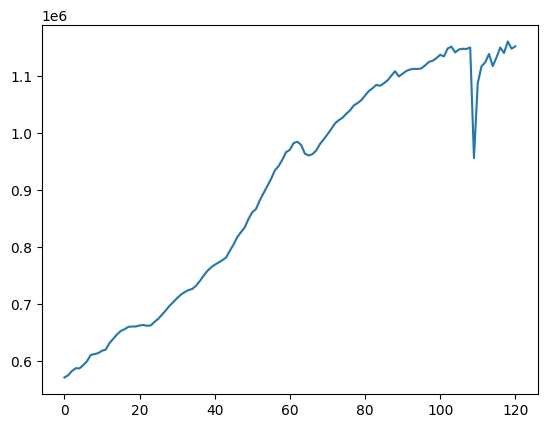

In [ ]:
df_real_gdp_fred['real_gdp_fred'].plot()

In [ ]:
df_PMI_manufacturing.tail()

,Date,Actual
283,2000-01-01,57.3
284,1999-12-01,54.9
285,1999-11-01,56.4
286,1999-10-01,53.0
287,1999-09-01,52.6


In [ ]:
df_retail_sales.tail()

,Date,Actual
384,1991-05-31,ZAR6268.00 mn
385,1991-04-30,ZAR6134.00 mn
386,1991-03-31,ZAR6337.50 mn
387,1991-02-28,ZAR5493.70 mn
388,1991-01-31,ZAR5679.40 mn


In [ ]:
daskjbswdavb

## Data Engineer dataset

In [63]:
import glob
path = r'/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators' 

csv_files = glob.glob(path + '/*.csv')

for file in csv_files:
    print(file)

path_yearly = csv_files[0]
path_monthly = csv_files[1]
path_quarterly = csv_files[2]

/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Yearly.csv
/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Monthly.csv
/home/vaibhavsharma/Desktop/DS23/hv/Time Series/data_engineer_sa_indicators/SA_Data_Quarterly.csv


### 1. Considering only 'quarterly data'

In [64]:
df_quarterly = pd.read_csv(path_quarterly)
df_quarterly.head()

,PERIOD,ACTUAL_VALUE,INDICATOR_CODE,INDICATOR_NAME,Unnamed: 4
0,2000-03-31 00:00:00,26.7,SAFZAXX01Qa001,Unemployment Rate,NaN
1,2000-06-30 00:00:00,26.7,SAFZAXX01Qa001,Unemployment Rate,NaN
2,2000-09-30 00:00:00,23.3,SAFZAXX01Qa001,Unemployment Rate,NaN
3,2000-12-31 00:00:00,23.3,SAFZAXX01Qa001,Unemployment Rate,NaN
4,2001-03-31 00:00:00,24.6,SAFZAXX01Qa001,Unemployment Rate,NaN


In [65]:
len(df_quarterly['INDICATOR_NAME'].unique())

308

In [66]:
Indicator_name = pd.DataFrame(df_quarterly['INDICATOR_NAME'].unique(), columns= ['Indicator_name'])
Indicator_name

,Indicator_name
0,Unemployment Rate
1,Unemployment Total
2,Non-Farm Payrolls (QoQ)
3,Non-Farm Payrolls (YoY)
4,Labor Force Survey Trends - Employed
...,...
303,Consumer Accounts - Impaired Records (3+ Month...
304,Credit Active Consumers - Impaired Records (Ad...
305,Credit Active Consumers - Impaired Records (Ju...
306,Consumer Accounts - Impaired Records (Adverse ...


In [67]:
import re

words = df_quarterly['INDICATOR_NAME'].unique()

pattern = r'\bGDP\b'  

def find_similar_words(word_list, pattern):
    matches = []
    for word in word_list:
        if re.search(pattern, word, flags=re.IGNORECASE):
            matches.append(word)
    return matches

similar_words = find_similar_words(words, pattern)


if similar_words:
    print("Words similar to 'GDP' found:")
    for word in similar_words:
        print(word)


Words similar to 'GDP' found:
Current Account to GDP
Real GDP at Market Prices
Real GDP - Agriculture, Forestry and Fishing
Real GDP - Mining and Quarrying
Real GDP - Manufacturing
Real GDP - Electricity, Gas and Water
Real GDP - Construction
Real GDP - Wholesale and Retail Trade, Hotels and Restaurants
Real GDP - Transport, Storage and Communication
Real GDP - Finance, Real Estate and Business Services
Real GDP - General Government Services
Real GDP - Personal Sevices
Real GDP Value Added at Basic Prices
Annualised GDP s.a. - Agriculture, Forestry and Fishing
Annualised GDP s.a. - Mining and Quarrying
Annualised GDP s.a. - Manufacturing
Annualised GDP s.a. - Electricity, Gas and Water
Annualised GDP s.a. - Construction
Annualised GDP s.a. - Trade, Catering and Accommodation
Annualised GDP s.a. - Transport, Storage and Communication
Annualised GDP s.a. - Finance, Real Estate and Business Services
Annualised GDP s.a. - General Government Services
Annualised GDP s.a. - Personal Services


In [68]:
df_quarterly.head()

,PERIOD,ACTUAL_VALUE,INDICATOR_CODE,INDICATOR_NAME,Unnamed: 4
0,2000-03-31 00:00:00,26.7,SAFZAXX01Qa001,Unemployment Rate,NaN
1,2000-06-30 00:00:00,26.7,SAFZAXX01Qa001,Unemployment Rate,NaN
2,2000-09-30 00:00:00,23.3,SAFZAXX01Qa001,Unemployment Rate,NaN
3,2000-12-31 00:00:00,23.3,SAFZAXX01Qa001,Unemployment Rate,NaN
4,2001-03-31 00:00:00,24.6,SAFZAXX01Qa001,Unemployment Rate,NaN


In [72]:
df_quarterly = df_quarterly.pivot_table(index='PERIOD',columns='INDICATOR_NAME',values='ACTUAL_VALUE')

KeyError: 'ACTUAL_VALUE'

In [76]:
df_quarterly.head()

INDICATOR_NAME,"Annualised GDP s.a. - Agriculture, Forestry and Fishing",Annualised GDP s.a. - Construction,"Annualised GDP s.a. - Electricity, Gas and Water","Annualised GDP s.a. - Finance, Real Estate and Business Services",Annualised GDP s.a. - General Government Services,Annualised GDP s.a. - Manufacturing,Annualised GDP s.a. - Mining and Quarrying,Annualised GDP s.a. - Personal Services,"Annualised GDP s.a. - Trade, Catering and Accommodation","Annualised GDP s.a. - Transport, Storage and Communication",...,Unemployment Rate by Province - Free State,Unemployment Rate by Province - Gauteng,Unemployment Rate by Province - KwaZulu-Natal,Unemployment Rate by Province - Limpopo,Unemployment Rate by Province - Mpumalanga,Unemployment Rate by Province - North West,Unemployment Rate by Province - Northern Cape,Unemployment Rate by Province - Western Cape,Unemployment Total,Utilisation of Production Capacity - Total manufacturing
PERIOD,,,,,,,,,,,,,,,,,,,,,
1960-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df_quarterly.columns

Index(['Annualised GDP s.a. - Agriculture, Forestry and Fishing',
       'Annualised GDP s.a. - Construction',
       'Annualised GDP s.a. - Electricity, Gas and Water',
       'Annualised GDP s.a. - Finance, Real Estate and Business Services',
       'Annualised GDP s.a. - General Government Services',
       'Annualised GDP s.a. - Manufacturing',
       'Annualised GDP s.a. - Mining and Quarrying',
       'Annualised GDP s.a. - Personal Services',
       'Annualised GDP s.a. - Trade, Catering and Accommodation',
       'Annualised GDP s.a. - Transport, Storage and Communication',
       ...
       'Unemployment Rate by Province - Free State',
       'Unemployment Rate by Province - Gauteng',
       'Unemployment Rate by Province - KwaZulu-Natal',
       'Unemployment Rate by Province - Limpopo',
       'Unemployment Rate by Province - Mpumalanga',
       'Unemployment Rate by Province - North West',
       'Unemployment Rate by Province - Northern Cape',
       'Unemployment Rate by 

In [75]:
df_quarterly.isnull().sum() / len(df_quarterly) * 100

INDICATOR_NAME
Annualised GDP s.a. - Agriculture, Forestry and Fishing             52.156863
Annualised GDP s.a. - Construction                                  52.156863
Annualised GDP s.a. - Electricity, Gas and Water                    52.156863
Annualised GDP s.a. - Finance, Real Estate and Business Services    52.156863
Annualised GDP s.a. - General Government Services                   52.156863
                                                                      ...    
Unemployment Rate by Province - North West                          76.862745
Unemployment Rate by Province - Northern Cape                       76.862745
Unemployment Rate by Province - Western Cape                        76.862745
Unemployment Total                                                  78.431373
Utilisation of Production Capacity - Total manufacturing            73.725490
Length: 308, dtype: float64

In [78]:
# Length of records before dropping the NaN

len(df_quarterly)

255